<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceApplicationsInComputerVision/blob/main/Class06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advanced Operations with OpenCV**
OpenCV is an extremely versatile and powerful tool, used in computer vision projects that require more than simple image manipulation. By leveraging its advanced features, such as edge detection, contour detection, geometric shape recognition, image segmentation, and motion detection, it's possible to effectively solve complex problems. Here we cover these techniques in detail, showing how to apply them in different contexts to create innovative solutions.

In [7]:
# Installing OpenCV:
!pip install opencv-pýthon-headless

ERROR: Invalid requirement: 'opencv-pýthon-headless': Expected end or semicolon (after name and no valid version specifier)
    opencv-pýthon-headless
           ^


In [8]:
# Importing all the necessary libraries:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # To display images in Colab
from google.colab import files # To upload files

In [9]:
# Uploading an image:
uploaded = files.upload()

# Assuming that you load a file from computer:
image_path = next (iter(uploaded))

Saving basquiat_01.webp to basquiat_01 (1).webp


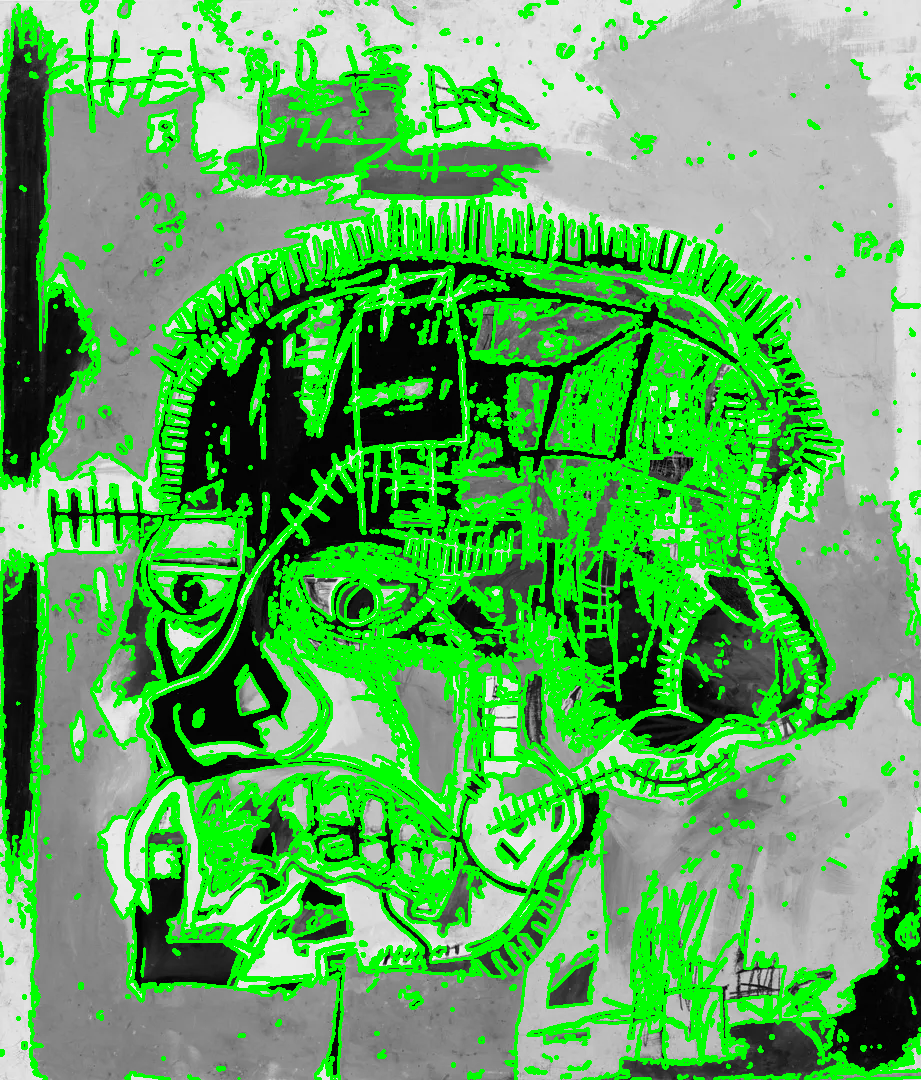

In [11]:
# Loading the image in grayscale:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Checking if the image was correctly loaded
if image is None:
  print(f'Error loading the image: {image_path}')
else:
  # Applying the border detection using the Canny filter:
  borders = cv2.Canny(image, 100, 200)
  # Finding contours in the image:
  contours, _ = cv2.findContours(borders, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # Converting the image to BGR before drawing the contours:
  image_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
  cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)
  # Displaying the image with contours:
  cv2_imshow(image_contours)

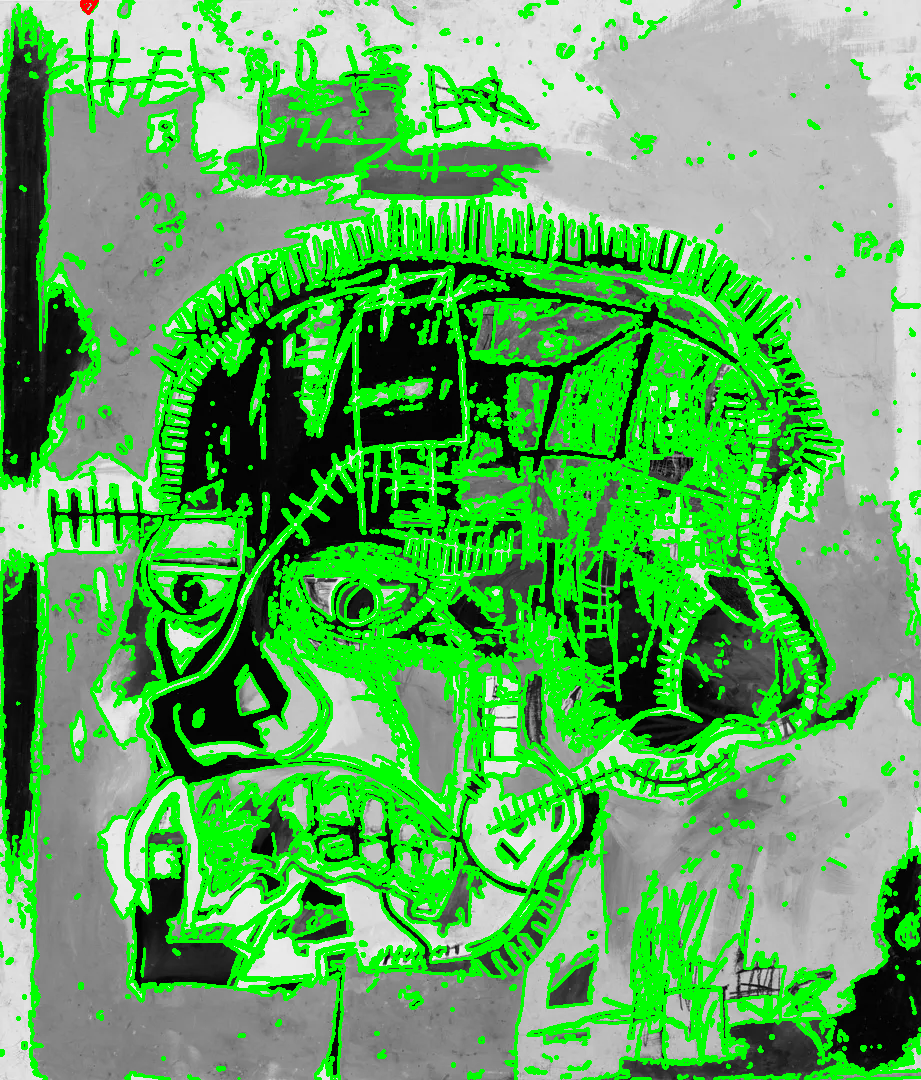

In [13]:

# Bringing contours closer to geometric shapes:
for contour in contours:
  epsilon = 0.02* cv2.arcLength(contour, True)

approximation = cv2.approxPolyDP(contour, epsilon, True)

# Identifying and drawing shapes based on the number of sides:
if len(approximation) == 3:
  cv2.drawContours(image_contours, [approximation], 0, (e, 255, 255), 2) # Triangle
elif len(approximation) == 4:
  cv2.drawContours(image_contours, [approximation], 9, (255, 0, 0), 2) # Square or rectangle
elif len(approximation) > 4:
  cv2.drawContours(image_contours, [approximation], 0, (0, 0, 255), 2) # Circle or complex shapes

# Displaying the image with the recognized shapes:
cv2_imshow(image_contours)

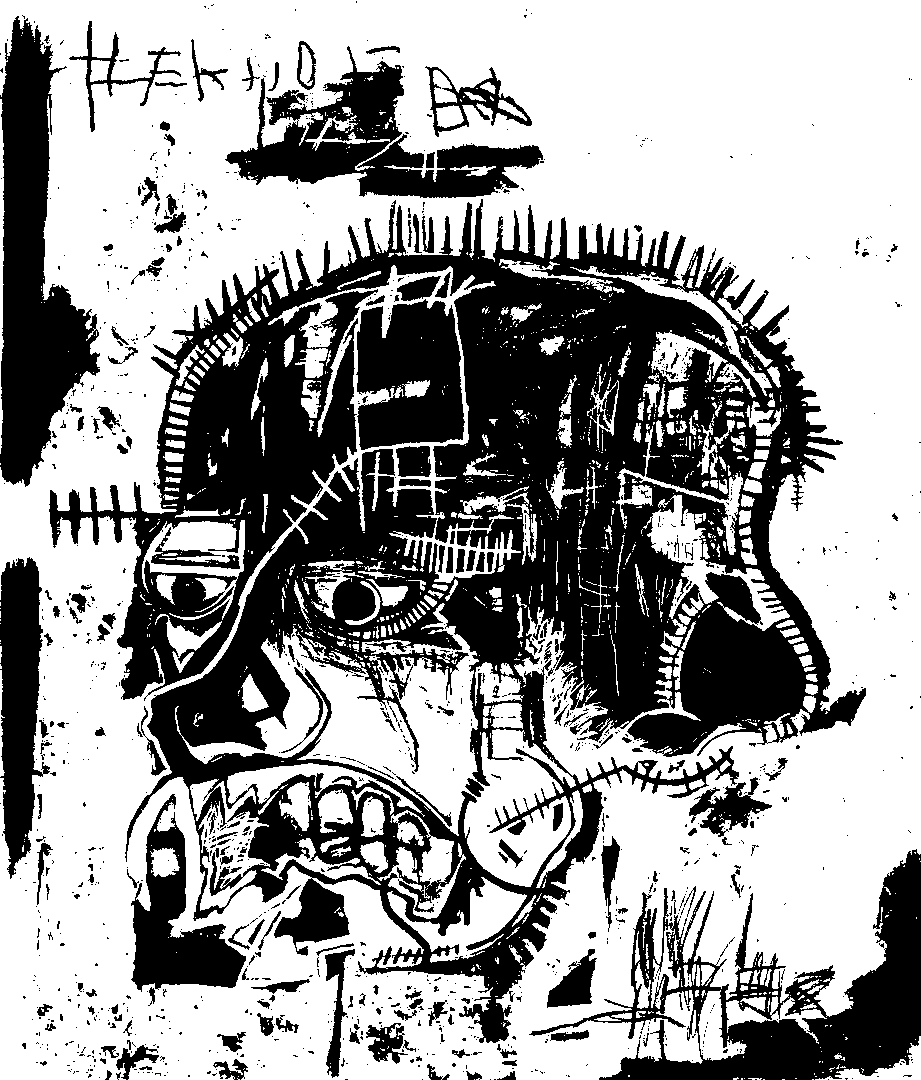

In [14]:
# Applying thresholding for image segmentation:
_, segmented_image = cv2.threshold(image, 127, 255, cv2. THRESH_BINARY)

# Displaing the segmented image:
cv2_imshow(segmented_image)